./data/alovExtData/target/10-LowContrast_video00008_prev_92.jpg,./data/alovExtData/searching/10-LowContrast_video00008_mid1_92_5.jpg,./data/alovExtData/searching/10-LowContrast_video00008_mid2_94_5.jpg,./data/alovExtData/searching/10-LowContrast_video00008_curr_97_5.jpg,47,98,86,186


<IPython.core.display.Javascript object>


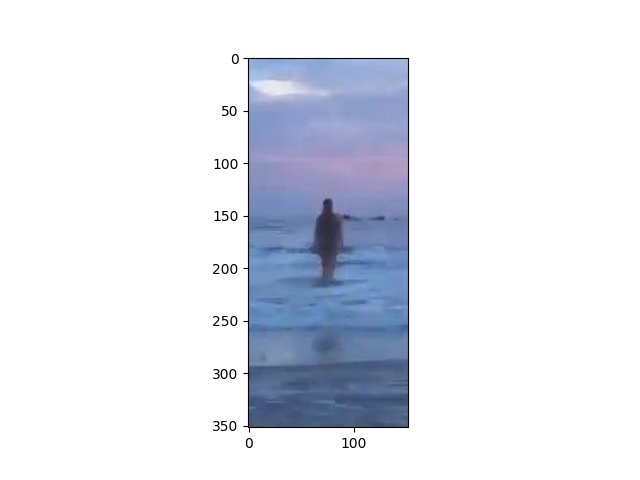

<IPython.core.display.Javascript object>


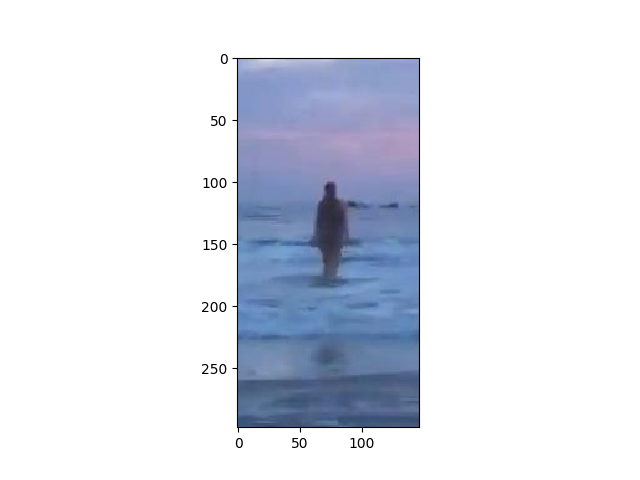

<IPython.core.display.Javascript object>


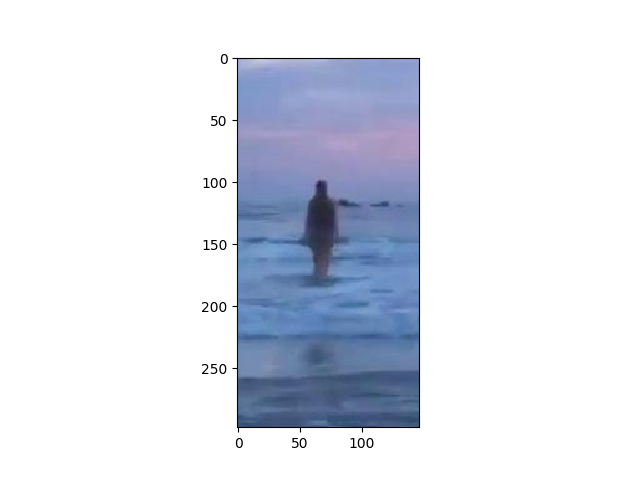

<IPython.core.display.Javascript object>


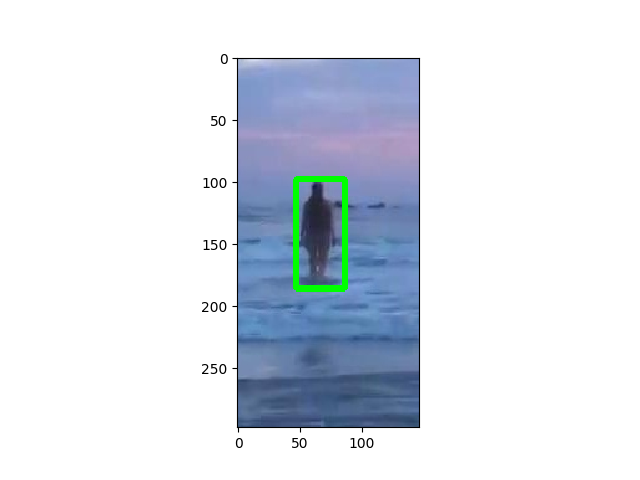

./data/alovExtData/target/10-LowContrast_video00008_prev_92.jpg,./data/alovExtData/searching/10-LowContrast_video00008_mid1_92_6.jpg,./data/alovExtData/searching/10-LowContrast_video00008_mid2_94_6.jpg,./data/alovExtData/searching/10-LowContrast_video00008_curr_97_6.jpg,41,108,80,196


In [58]:
import cv2
import tensorflow as tf
import tensorboard
import numpy as np
from matplotlib import pyplot as plt
import glob
from random import shuffle
from IPython.display import Image
%matplotlib notebook

def viewer(img):
    fig = plt.figure()
    #plt.imshow(cv2.resize(img[:,:,::-1], (227,227)))
    plt.imshow(img[:,:,::-1])
    fig.show()

counter = 0
targetFileName = 'none'
alovTrainFileLines = [line.rstrip() for line in open("./alovTrainSet.txt").readlines()]
for lineIdx in range(5, len(alovTrainFileLines), 1):
    print alovTrainFileLines[lineIdx]
    parseLine = alovTrainFileLines[lineIdx].split(',')
    target = cv2.imread(parseLine[0])
    mid1 = cv2.imread(parseLine[1])
    mid2 = cv2.imread(parseLine[2])
    search = cv2.imread(parseLine[3])
    #[bbx1, bby1, bbx2, bby2] = [int(float(parseLine[4])*search.shape[1]), int(float(parseLine[5])*search.shape[0]), int(float(parseLine[6])*search.shape[1]), int(float(parseLine[7])*search.shape[0])]
    [bbx1, bby1, bbx2, bby2] = [int(parseLine[4]), int(parseLine[5]), int(parseLine[6]), int(parseLine[7])]
    cv2.rectangle(search, (bbx1, bby1), (bbx2 ,bby2), (0,255,0), 3)
    if targetFileName != parseLine[0]:
        counter += 1
        if counter == 2:
            break
        #print [bbx1, bby1, bbx2, bby2]
        viewer(target)
    #targetFileName = parseLine[0]
    viewer(mid1)
    viewer(mid2)
    viewer(search)

In [14]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def viewer(img):
    fig = plt.figure()
    #plt.imshow(cv2.resize(img[:,:,::-1], (227,227)))
    plt.imshow(img[:,:,::-1])
    fig.show()
    
a=cv2.imread('data/alovData/05-Shape/05-Shape_video00012/00000136.jpg')
b=cv2.imread('data/alovData/05-Shape/05-Shape_video00012/00000146.jpg')
viewer(a)
viewer(b)

ImportError: No module named JSAnimation

In [1]:
import cv2
import tensorflow as tf
import tensorboard
import numpy as np
from matplotlib import pyplot as plt
import glob
import re
from random import shuffle
from IPython.display import Image
%matplotlib notebook

trainFileNoAug = open("./trainSetNoAugOnlyAlov.txt", "w")
trainFileLines = [line.rstrip() for line in open("./trainSet.txt").readlines()]
for lineIdx in range(len(trainFileLines)):
    parseLine = trainFileLines[lineIdx].split(',')
    target = parseLine[0]
    search = parseLine[1]
    if re.search("_curr_\d+_0\.jpg", search):
        trainFileNoAug.write("{},{},{},{},{},{}\n".format(target, search, parseLine[2], parseLine[3], parseLine[4], parseLine[5]))
        
trainFileNoAug.close()

In [54]:
res = np.random.laplace(1, 1./2)
import math
(7-1.)/4

1.5

Extracting Alov data...


<IPython.core.display.Javascript object>


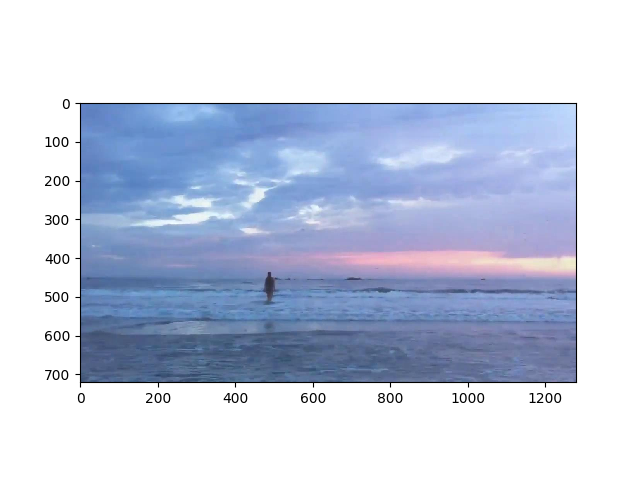

<IPython.core.display.Javascript object>


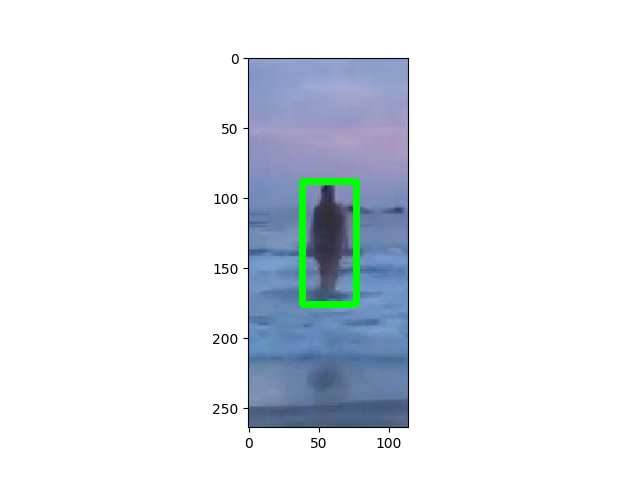

<IPython.core.display.Javascript object>


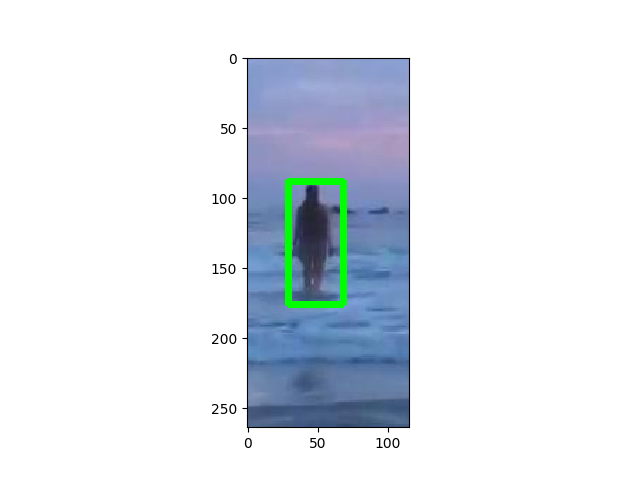

In [11]:
import cv2
import tensorflow as tf
import tensorboard
import numpy as np
from matplotlib import pyplot as plt
import glob
import re
import os
import sys
import xml.etree.ElementTree as ET
from IPython.display import Image
%matplotlib notebook
#%pdb


# Augmentation params as in the paper
augShift = 1./5
augScale = 1./15
minScale = 0.6
maxScale = 1.4
k1 = k2 = 3
k3 = 10

alovData = "./data/alovData"
alovDataGT = "./data/alovDataGT"
imageNetData = "./data/imageNetData"
imageNetDataGT = "./data/imageNetDataGT"
votData = "./data/votTestData"

alovExtdata = "./data/alovExtData"
if not os.path.exists(alovExtdata):
    os.mkdir(alovExtdata)

alovExtdataTarget = alovExtdata + "/target"
if not os.path.exists(alovExtdataTarget):
    os.mkdir(alovExtdataTarget)

alovExtdataSearching = alovExtdata + "/searching"
if not os.path.exists(alovExtdataSearching):
    os.mkdir(alovExtdataSearching)

imageNetExtdata = "./data/imageNetExtData"
if not os.path.exists(imageNetExtdata):
    os.mkdir(imageNetExtdata)

imageNetExtdataTarget = imageNetExtdata + "/target"
if not os.path.exists(imageNetExtdataTarget):
    os.mkdir(imageNetExtdataTarget)

imageNetExtdataSearching = imageNetExtdata + "/searching"
if not os.path.exists(imageNetExtdataSearching):
    os.mkdir(imageNetExtdataSearching)

votExtdata = "./data/votExtData"
if not os.path.exists(votExtdata):
    os.mkdir(votExtdata)

votExtdataTarget = votExtdata + "/target"
if not os.path.exists(votExtdataTarget):
    os.mkdir(votExtdataTarget)

votExtdataSearching = votExtdata + "/searching"
if not os.path.exists(votExtdataSearching):
    os.mkdir(votExtdataSearching)


def extBB(annParse):
    bbx1 = min(annParse[1],annParse[3],annParse[5],annParse[7])
    bby1 = min(annParse[2],annParse[4],annParse[6],annParse[8])
    bbx2 = max(annParse[1],annParse[3],annParse[5],annParse[7])
    bby2 = max(annParse[2],annParse[4],annParse[6],annParse[8])
    return [bbx1, bby1, bbx2, bby2]

def extBBvot(annParse):
    bbx1 = min(annParse[0],annParse[2],annParse[4],annParse[6])
    bby1 = min(annParse[1],annParse[3],annParse[5],annParse[7])
    bbx2 = max(annParse[0],annParse[2],annParse[4],annParse[6])
    bby2 = max(annParse[1],annParse[3],annParse[5],annParse[7])
    return [bbx1, bby1, bbx2, bby2]

def viewer(img):
    fig = plt.figure()
    #plt.imshow(cv2.resize(img[:,:,::-1], (227,227)))
    plt.imshow(img[:,:,::-1])
    fig.show()

def goturnAugmentation(augIdx, cxPrev, cyPrev, bbx1Prev, bby1Prev, bbx2Prev, bby2Prev, frameRes, bbx1Curr, bby1Curr, bbx2Curr, bby2Curr):
    width = bbx2Prev - bbx1Prev
    height = bby2Prev - bby1Prev
    cxPrev = bbx1Prev + (width/2)
    cyPrev = bby1Prev + (height/2)
    newWidth = -1
    newHeight = -1
    newCx = -1
    newCy = -1

    if augIdx == 0:
        newHeight = frameRes[0]-1 if k2*height > frameRes[0]-1 else k2*height
        newWidth = frameRes[1]-1 if k2*width > frameRes[1]-1 else k2*width
        newCx = cxPrev
        newCy = cyPrev
        startCropCurrY = 0 if newCy-newHeight/2 < 0 else newCy-newHeight/2
        endCropCurrY = frameRes[0]-1 if newCy+newHeight/2 > frameRes[0]-1 else newCy+newHeight/2
        startCropCurrX = 0 if newCx-newWidth/2 < 0 else newCx-newWidth/2
        endCropCurrX = frameRes[1]-1 if newCx+newWidth/2 > frameRes[1]-1 else newCx+newWidth/2
        bbx1New = 0 if newCx-newWidth/2 < 0 else newCx-newWidth/2
        bby1New = 0 if newCy-newHeight/2 < 0 else newCy-newHeight/2

    else:
        numOfTries = 10
        while (newWidth < 0 or newWidth > frameRes[1]-1) and numOfTries:
            scaleW = max(minScale, min(maxScale, np.random.laplace(1, augScale)))
            newWidth = int(k2*width*scaleW)
            numOfTries -= 1
            if numOfTries == 0:
                return [0, 0, 0, 0, 0, 0, 0, 0, False]

        numOfTries = 10
        while (newHeight < 0 or newHeight > frameRes[0]-1) and numOfTries:
            scaleH = max(minScale, min(maxScale, np.random.laplace(1, augScale)))
            newHeight = int(k2*height*scaleH)
            numOfTries -= 1
            if numOfTries == 0:
                return [0, 0, 0, 0, 0, 0, 0, 0, False]

        numOfTries = 10
        firstIter = True
        while (firstIter or newCx < cxPrev-((width*k2)/2) or newCx > cxPrev+((width*k2)/2) or newCx-newWidth/2 < 0 or newCx+newWidth/2 > frameRes[1]-1) and numOfTries:
            newCx = cxPrev + width*np.random.laplace(0, augShift)
            newCx = int(min(frameRes[1]-newWidth/2, max(newWidth/2,newCx)))
            numOfTries -= 1
            firstIter = False
            if numOfTries == 0:
                return [0, 0, 0, 0, 0, 0, 0, 0, False]

        numOfTries = 10
        firstIter = True
        while (firstIter or newCy < cyPrev-((height*k2)/2) or newCy > cyPrev+((height*k2)/2) or newCy-newHeight/2 < 0 or newCy+newHeight/2 > frameRes[0]-1) and numOfTries:
            newCy = cyPrev + height*np.random.laplace(0, augShift)
            newCy = int(min(frameRes[1]-newHeight/2, max(newHeight/2,newCy)))
            numOfTries -= 1
            firstIter = False
            if numOfTries == 0:
                return [0, 0, 0, 0, 0, 0, 0, 0, False]

        bbx1New = newCx - newWidth/2
        bbx2New = newCx + newWidth/2
        bby1New = newCy - newHeight/2
        bby2New = newCy + newHeight/2

        startCropCurrY = bby1New
        endCropCurrY = bby2New
        startCropCurrX = bbx1New
        endCropCurrX = bbx2New


    bbx1CurrCrop = 0 if bbx1Curr-bbx1New < 0 else bbx1Curr-bbx1New
    bbx2CurrCrop = 0 if bbx2Curr-bbx1New < 0 else bbx2Curr-bbx1New
    bby1CurrCrop = 0 if bby1Curr-bby1New < 0 else bby1Curr-bby1New
    bby2CurrCrop = 0 if bby2Curr-bby1New < 0 else bby2Curr-bby1New
    
    # Check that the current frame crop contain the object
    widthCurr = bbx2Curr - bbx1Curr
    heightCurr = bby2Curr - bby1Curr
    cxCurr = bbx1Curr + (widthCurr/2)
    cyCurr = bby1Curr + (heightCurr/2)
    if cxCurr > endCropCurrX or cxCurr < startCropCurrX or cyCurr > endCropCurrY or cyCurr < startCropCurrY:
        return [0, 0, 0, 0, 0, 0, 0, 0, False]

    return [bbx1CurrCrop, bby1CurrCrop, bbx2CurrCrop, bby2CurrCrop, startCropCurrY, endCropCurrY, startCropCurrX, endCropCurrX, True]

def dataExt():
    # Extract Alov data
    print "Extracting Alov data..."

    alovTrainSet = open("alovTrainSet.txt", "w")

    categories = glob.glob(alovData + "/*")
    for category in categories:
        if re.search("notToUseForTrain", category):
            print "skip ALOV duplication with VOT..."
            continue
        videos = glob.glob(category + "/*")
        for video in videos:
            videoAnn = re.sub("\/alovData\/", "/alovDataGT/", video)
            videoAnn = re.sub("$", ".ann", videoAnn)
            framesAnn = [line.rstrip() for line in open(videoAnn).readlines()]
            frames = glob.glob(video + "/*.jpg")
            frames.sort()
            if len(framesAnn) < 2:
                print "video {} have less then 2 annotated frames".format(video.split("/")[-1])
                continue
            for frameAnnIndx in xrange(1, len(framesAnn), 1):
                annParsePrev = [int(float(number)) for number in framesAnn[frameAnnIndx-1].split()]
                annParseCurr = [int(float(number)) for number in framesAnn[frameAnnIndx].split()]
                framePrev = cv2.imread(frames[annParsePrev[0]-1])
                frameCurr = cv2.imread(frames[annParseCurr[0]-1])
                [bbx1Prev, bby1Prev, bbx2Prev, bby2Prev] = extBB(annParsePrev)
                [bbx1Curr, bby1Curr, bbx2Curr, bby2Curr] = extBB(annParseCurr)

                cxPrev = bbx1Prev + ((bbx2Prev - bbx1Prev)/2)
                cyPrev = bby1Prev + ((bby2Prev - bby1Prev)/2)
                bbPadsPrevH = k1*((bby2Prev - bby1Prev)/2)
                bbPadsPrevW = k1*((bbx2Prev - bbx1Prev)/2)

                startCropPrevY = 0 if cyPrev-bbPadsPrevH < 0 else cyPrev-bbPadsPrevH
                endCropPrevY = framePrev.shape[0]-1 if cyPrev+bbPadsPrevH > framePrev.shape[0]-1 else cyPrev+bbPadsPrevH
                startCropPrevX = 0 if cxPrev-bbPadsPrevW < 0 else cxPrev-bbPadsPrevW
                endCropPrevX = framePrev.shape[1]-1 if cxPrev+bbPadsPrevW > framePrev.shape[1]-1 else cxPrev+bbPadsPrevW

                framePrevCropPads = framePrev[startCropPrevY:endCropPrevY, startCropPrevX:endCropPrevX]
                fileNameTarget = "{}/{}_prev_{}".format(alovExtdataTarget, (frames[annParsePrev[0]-1].split("/"))[-2], annParsePrev[0])
                cv2.imwrite(fileNameTarget + ".jpg", framePrevCropPads)

                viewer(framePrev)
                cv2.rectangle(framePrev, (bbx1Prev,bby1Prev), (bbx2Prev,bby2Prev), (0,255,0), 3)
                viewer(framePrevCropPads)
                invalidAugCounter = 0
                for augIdx in range(k3):
                    [bbx1CurrCrop, bby1CurrCrop, bbx2CurrCrop, bby2CurrCrop, startCropCurrY, endCropCurrY, startCropCurrX, endCropCurrX, valid] = goturnAugmentation(augIdx, cxPrev, cyPrev, bbx1Prev, bby1Prev, bbx2Prev, bby2Prev, frameCurr.shape[:2], bbx1Curr, bby1Curr, bbx2Curr, bby2Curr)
                    if not valid:
                        invalidAugCounter += 1
                        continue
                    frameCurrCropPads = frameCurr[startCropCurrY:endCropCurrY, startCropCurrX:endCropCurrX]
                    fileNameSearch = "{}/{}_curr_{}_{}".format(alovExtdataSearching, (frames[annParseCurr[0]-1].split("/"))[-2], annParseCurr[0], augIdx)
                    cv2.imwrite(fileNameSearch + ".jpg", frameCurrCropPads)
                    annFile = open(fileNameSearch + ".ann", "w")
                    annFile.write("{},{},{},{}".format(bbx1CurrCrop, bby1CurrCrop, bbx2CurrCrop, bby2CurrCrop))
                    annFile.close()
                    alovTrainSet.write("{}.jpg,{}.jpg,{},{},{},{}\n".format(fileNameTarget, fileNameSearch, bbx1CurrCrop, bby1CurrCrop, bbx2CurrCrop, bby2CurrCrop))
                    cv2.rectangle(frameCurrCropPads, (bbx1CurrCrop,bby1CurrCrop), (bbx2CurrCrop,bby2CurrCrop), (0,255,0), 3)
                    cv2.rectangle(frameCurr, (bbx1Curr,bby1Curr), (bbx2Curr,bby2Curr), (0,255,0), 3)
                    viewer(frameCurrCropPads)
                    return

                if invalidAugCounter:
                    print "For frame {}_{}, not all augmentation succeeded ({} augmentation)".format(frames[annParseCurr[0]-1].split("/")[-2], annParseCurr[0], 10-invalidAugCounter)


    alovTrainSet.close()


    # Extract ImageNet data
    print "Extracting ImageNet data..."

    imageNetTrainSet = open("imageNetTrainSet.txt", "w")

    images = glob.glob(imageNetData + "/*/" + "/*")
    imagesGT = glob.glob(imageNetDataGT + "/*/" + "/*")
    images.sort()
    imagesGT.sort()

    for image in images:
        imageGT = re.sub("\/imageNetData\/", "/imageNetDataGT/", image)
        imageGT = re.sub("JPEG$", "xml", imageGT)

        xmlTree = ET.parse(imageGT)
        root = xmlTree.getroot()

        if len(root.findall('object')) != 1:
            print "{} has no single object annotated".format(image)
            continue

        framePrev = cv2.imread(image)

        obj = root.find('object')
        bbElement = obj.find('bndbox')
        [bbx1Prev, bby1Prev, bbx2Prev, bby2Prev] = [int(bbElement.find('xmin').text), int(bbElement.find('ymin').text), int(bbElement.find('xmax').text), int(bbElement.find('ymax').text)]

        cxPrev = bbx1Prev + ((bbx2Prev - bbx1Prev)/2)
        cyPrev = bby1Prev + ((bby2Prev - bby1Prev)/2)
        bbPadsPrevH = k1*((bby2Prev - bby1Prev)/2)
        bbPadsPrevW = k1*((bbx2Prev - bbx1Prev)/2)

        startCropPrevY = 0 if cyPrev-bbPadsPrevH < 0 else cyPrev-bbPadsPrevH
        endCropPrevY = framePrev.shape[0]-1 if cyPrev+bbPadsPrevH > framePrev.shape[0]-1 else cyPrev+bbPadsPrevH
        startCropPrevX = 0 if cxPrev-bbPadsPrevW < 0 else cxPrev-bbPadsPrevW
        endCropPrevX = framePrev.shape[1]-1 if cxPrev+bbPadsPrevW > framePrev.shape[1]-1 else cxPrev+bbPadsPrevW

        framePrevCropPads = framePrev[startCropPrevY:endCropPrevY, startCropPrevX:endCropPrevX]
        fileNameTarget = "{}/{}_prev".format(imageNetExtdataTarget, image.split("/")[-1][:-5])
        cv2.imwrite(fileNameTarget + ".jpg", framePrevCropPads)

        #cv2.rectangle(framePrev, (bbx1Prev,bby1Prev), (bbx2Prev,bby2Prev), (0,255,0), 3)
        #viewer(framePrevCropPads)
        invalidAugCounter = 0
        for augIdx in range(1,k3):
            [bbx1CurrCrop, bby1CurrCrop, bbx2CurrCrop, bby2CurrCrop, startCropCurrY, endCropCurrY, startCropCurrX, endCropCurrX, valid] = goturnAugmentation(augIdx, cxPrev, cyPrev, bbx1Prev, bby1Prev, bbx2Prev, bby2Prev, framePrev.shape[:2], bbx1Prev, bby1Prev, bbx2Prev, bby2Prev)
            if not valid:
                invalidAugCounter += 1
                continue
            frameCurrCropPads = framePrev[startCropCurrY:endCropCurrY, startCropCurrX:endCropCurrX]
            fileNameSearch = "{}/{}_curr_{}".format(imageNetExtdataSearching, image.split("/")[-1][:-5], augIdx)
            cv2.imwrite(fileNameSearch + ".jpg", frameCurrCropPads)
            annFile = open(fileNameSearch + ".ann", "w")
            annFile.write("{},{},{},{}".format(bbx1CurrCrop, bby1CurrCrop, bbx2CurrCrop, bby2CurrCrop))
            annFile.close()
            imageNetTrainSet.write("{}.jpg,{}.jpg,{},{},{},{}\n".format(fileNameTarget, fileNameSearch, bbx1CurrCrop, bby1CurrCrop, bbx2CurrCrop, bby2CurrCrop))
            #cv2.rectangle(frameCurrCropPads, (bbx1CurrCrop,bby1CurrCrop), (bbx2CurrCrop,bby2CurrCrop), (0,255,0), 3)
            #viewer(frameCurrCropPads)

        if invalidAugCounter:
            print "For frame {}, not all augmentation succeeded ({} augmentation)".format(image.split("/")[-1][:-50], 10-invalidAugCounter)

    imageNetTrainSet.close()


    # Extract vot data
    print "Extracting VOT data..."

    votTestSet = open("votTestSet.txt", "w")

    videos = glob.glob(votData + "/*")
    for video in videos:
        if re.search("list\.txt", video):
            print "skip category list file"
            continue
        videoAnn = video + "/groundtruth.txt"
        framesAnn = [line.rstrip() for line in open(videoAnn).readlines()]
        frames = glob.glob(video + "/*.jpg")
        frames.sort()
        if len(framesAnn) < 5:
            print "video {} is shorter then 5 frames".format(video.split("/")[-1])
            continue
        for frameAnnIndx in xrange(4, len(framesAnn), 1):
            annParsePrev = [int(float(number)) for number in framesAnn[frameAnnIndx-4].split(',')]
            annParseCurr = [int(float(number)) for number in framesAnn[frameAnnIndx].split(',')]
            framePrev = cv2.imread(frames[frameAnnIndx-4])
            frameCurr = cv2.imread(frames[frameAnnIndx])
            [bbx1Prev, bby1Prev, bbx2Prev, bby2Prev] = extBBvot(annParsePrev)
            [bbx1Curr, bby1Curr, bbx2Curr, bby2Curr] = extBBvot(annParseCurr)

            cxPrev = bbx1Prev + ((bbx2Prev - bbx1Prev)/2)
            cyPrev = bby1Prev + ((bby2Prev - bby1Prev)/2)
            bbPadsPrevH = k1*((bby2Prev - bby1Prev)/2)
            bbPadsPrevW = k1*((bbx2Prev - bbx1Prev)/2)

            startCropPrevY = 0 if cyPrev-bbPadsPrevH < 0 else cyPrev-bbPadsPrevH
            endCropPrevY = framePrev.shape[0]-1 if cyPrev+bbPadsPrevH > framePrev.shape[0]-1 else cyPrev+bbPadsPrevH
            startCropPrevX = 0 if cxPrev-bbPadsPrevW < 0 else cxPrev-bbPadsPrevW
            endCropPrevX = framePrev.shape[1]-1 if cxPrev+bbPadsPrevW > framePrev.shape[1]-1 else cxPrev+bbPadsPrevW

            framePrevCropPads = framePrev[startCropPrevY:endCropPrevY, startCropPrevX:endCropPrevX]
            fileNameTarget = "{}/{}_prev_{}".format(votExtdataTarget, video.split("/")[-1], frames[frameAnnIndx-5].split("/")[-1][:-4])
            cv2.imwrite(fileNameTarget + ".jpg", framePrevCropPads)

            #viewer(framePrev)
            #cv2.rectangle(framePrev, (bbx1Prev,bby1Prev), (bbx2Prev,bby2Prev), (0,255,0), 3)
            #viewer(framePrevCropPads)
            invalidAugCounter = 0
            for augIdx in range(k3):
                [bbx1CurrCrop, bby1CurrCrop, bbx2CurrCrop, bby2CurrCrop, startCropCurrY, endCropCurrY, startCropCurrX, endCropCurrX, valid] = goturnAugmentation(augIdx, cxPrev, cyPrev, bbx1Prev, bby1Prev, bbx2Prev, bby2Prev, frameCurr.shape[:2], bbx1Curr, bby1Curr, bbx2Curr, bby2Curr)
                if not valid:
                    invalidAugCounter += 1
                    continue
                frameCurrCropPads = frameCurr[startCropCurrY:endCropCurrY, startCropCurrX:endCropCurrX]
                fileNameSearch = "{}/{}_curr_{}_{}".format(votExtdataSearching, video.split("/")[-1], frames[frameAnnIndx].split("/")[-1][:-4], augIdx)
                cv2.imwrite(fileNameSearch + ".jpg", frameCurrCropPads)
                annFile = open(fileNameSearch + ".ann", "w")
                annFile.write("{},{},{},{}".format(bbx1CurrCrop, bby1CurrCrop, bbx2CurrCrop, bby2CurrCrop))
                annFile.close()
                votTestSet.write("{}.jpg,{}.jpg,{},{},{},{}\n".format(fileNameTarget, fileNameSearch, bbx1CurrCrop, bby1CurrCrop, bbx2CurrCrop, bby2CurrCrop))
                #cv2.rectangle(frameCurrCropPads, (bbx1CurrCrop,bby1CurrCrop), (bbx2CurrCrop,bby2CurrCrop), (0,255,0), 3)
                #cv2.rectangle(frameCurr, (bbx1Curr,bby1Curr), (bbx2Curr,bby2Curr), (0,255,0), 3)
                #viewer(frameCurrCropPads)

                if invalidAugCounter:
                    print "For frame {}_{}, not all augmentation succeeded ({} augmentation)".format(video.split("/")[-1], frames[frameAnnIndx].split("/")[-1][:-4], 10-invalidAugCounter)


    votTestSet.close()

if __name__ == '__main__':

    dataExt()
    

In [306]:
#import pickle
#fileName = "{}/{}_curr_{}_{}.pkl".format(alovExtdata, (frames[annParseCurr[0]].split("/"))[-2], annParseCurr[0], augIdx)
#pickle.dump([bbx1Curr,bby1Curr, bbx2Curr, bby2Curr], open(fileName, "wb" ) )
#ann = pickle.load( open("{}/{}_curr_{}_{}.pkl".format(alovExtdata, (frames[annParseCurr[0]].split("/"))[-2], annParseCurr[0], augIdx), "rb" ) )


In [72]:
import cv2
import numpy as np
import os
import sys
from random import shuffle

alovTrainFileLines = [line.rstrip() for line in open("./alovTrainSet.txt").readlines()]
imageNetTrainFileLines = [line.rstrip() for line in open("./imageNetTrainSet.txt").readlines()]
shuffle(alovTrainFileLines)
shuffle(imageNetTrainFileLines)
trainSet = open("trainSet.txt", "w")
trainSetLenght = max(len(imageNetTrainFileLines), len(alovTrainFileLines))
for i in range(trainSetLenght):
    idxForShortList = i % min(len(imageNetTrainFileLines), len(alovTrainFileLines))
    parseLineAlov = alovTrainFileLines[idxForShortList].split(',')
    parseLineImageNet = imageNetTrainFileLines[i].split(',')
    searchAlov = cv2.imread(parseLineAlov[1])
    searchImageNet = cv2.imread(parseLineImageNet[1])
    heightAlov = searchAlov.shape[0]
    widhtAlov = searchAlov.shape[1]
    heightImageNet = searchImageNet.shape[0]
    widhtImageNet = searchImageNet.shape[1]
    # Write Alov
    [bbx1, bby1, bbx2, bby2] = [float(parseLineAlov[2])/widhtAlov, float(parseLineAlov[3])/heightAlov, float(parseLineAlov[4])/widhtAlov, float(parseLineAlov[5])/heightAlov]
    trainSet.write("{},{},{},{},{},{}\n".format(parseLineAlov[0], parseLineAlov[1], bbx1, bby1, bbx2, bby2))
    # Write ImageNet
    [bbx1, bby1, bbx2, bby2] = [float(parseLineImageNet[2])/widhtImageNet, float(parseLineImageNet[3])/heightImageNet, float(parseLineImageNet[4])/widhtImageNet, float(parseLineImageNet[5])/heightImageNet]
    trainSet.write("{},{},{},{},{},{}\n".format(parseLineImageNet[0], parseLineImageNet[1], bbx1, bby1, bbx2, bby2))
    
trainSet.close()

testFileLines = [line.rstrip() for line in open("./votTestSet.txt").readlines()]
shuffle(testFileLines)
testSet = open("testSet.txt", "w")
for i in range(len(testFileLines)):
    parseLine = testFileLines[i].split(',')
    searchImage = cv2.imread(parseLine[1])
    widht = searchImage.shape[1]
    height = searchImage.shape[0]
    # Write VOT
    [bbx1, bby1, bbx2, bby2] = [float(parseLine[2])/widht, float(parseLine[3])/height, float(parseLine[4])/widht, float(parseLine[5])/height]
    testSet.write("{},{},{},{},{},{}\n".format(parseLine[0], parseLine[1], bbx1, bby1, bbx2, bby2))
    
testSet.close()

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import glob
import re
import os
import sys

import goturn_net


gpu = 0
os.environ['CUDA_VISIBLE_DEVICES'] = str(gpu)

def main():
    
    def extBBvot(annParse):
        bbx1 = min(annParse[0],annParse[2],annParse[4],annParse[6])
        bby1 = min(annParse[1],annParse[3],annParse[5],annParse[7])
        bbx2 = max(annParse[0],annParse[2],annParse[4],annParse[6])
        bby2 = max(annParse[1],annParse[3],annParse[5],annParse[7])
        return [bbx1, bby1, bbx2, bby2]
    
    def bb_intersection_over_union(boxA, boxB):
        # determine the (x, y)-coordinates of the intersection rectangle
        xA = max(boxA[0], boxB[0])
        yA = max(boxA[1], boxB[1])
        xB = min(boxA[2], boxB[2])
        yB = min(boxA[3], boxB[3])
        
        # compute the area of intersection rectangle
        interArea = (xB - xA + 1) * (yB - yA + 1)
        
        # compute the area of both the prediction and ground-truth rectangles
        boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
        boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
        
        # compute the intersection over union by taking the intersection
        # area and dividing it by the sum of prediction + ground-truth
        # areas - the interesection area
        iou = interArea / float(boxAArea + boxBArea - interArea)
        
        # return the intersection over union value
        return iou 
    
    
    # Load the video frames and annotations
    video = "./data/votTestData/basketball/" #sys.argv[1]
    model = "./snaps/goturnTrain_trainConvBatch50not20WithCheckpoint/10_15000.ckpt" #sys.argv[2]
    if not os.path.exists(video):
        print "No such a video!"
        exit(1)
        
    videoAnn = video + "/groundtruth.txt"
    framesAnn = [line.rstrip() for line in open(videoAnn).readlines()]       
    frames = glob.glob(video + "/*.jpg")
    frames.sort()
    
    with tf.Session() as sess:
        # Initiate the network
        tracknet = goturn_net.TRACKNET(1, 0.0005, False)
        tracknet.build()
        #init = tf.global_variables_initializer()
        #init_local = tf.local_variables_initializer()
        #sess.run(init)
        #sess.run(init_local)
        saver = tf.train.Saver()
        saver.restore(sess, model)
        
        fig = plt.figure()
        predBB = [0,0,0,0]
        for frameAnnIndx in xrange(1,len(framesAnn)):
            # Extract GT annotation or predicted annotation
            annParseTarget = [int(float(number)) for number in framesAnn[frameAnnIndx-1].split(',')]
            annParseSearch = [int(float(number)) for number in framesAnn[frameAnnIndx].split(',')]
            
            if frameAnnIndx == 1 or iou < 0.2:
                [bbx1, bby1, bbx2, bby2] = extBBvot(annParseTarget)
            else:
                [bbx1, bby1, bbx2, bby2] = predBB
            
            # Read the pair of frames 
            targetFrame = cv2.imread(frames[frameAnnIndx-1])
            searchFrame = cv2.imread(frames[frameAnnIndx])
            
            # Prepeare the net inputs           
            cx = bbx1 + ((bbx2 - bbx1)/2)
            cy = bby1 + ((bby2 - bby1)/2)
            bbPadsH = 2*((bby2 - bby1)/2)
            bbPadsW = 2*((bbx2 - bbx1)/2)

            startCropY = 0 if cy-bbPadsH < 0 else cy-bbPadsH
            endCropY = targetFrame.shape[0]-1 if cy+bbPadsH > targetFrame.shape[0]-1 else cy+bbPadsH
            startCropX = 0 if cx-bbPadsW < 0 else cx-bbPadsW
            endCropX = targetFrame.shape[1]-1 if cx+bbPadsW > targetFrame.shape[1]-1 else cx+bbPadsW

            target = np.copy(targetFrame[startCropY:endCropY, startCropX:endCropX])
            search = np.copy(searchFrame[startCropY:endCropY, startCropX:endCropX])
            
            # opencv reads as BGR and tensorflow gets RGB            
            target = cv2.resize(target[:,:,::-1], (227,227))
            search = cv2.resize(search[:,:,::-1], (227,227))
            target = np.expand_dims(target, axis=0)
            search = np.expand_dims(search, axis=0)

            # Infer
            [res] = sess.run([tracknet.fc4], feed_dict={tracknet.image: search, tracknet.target: target})        
            
            # Convert resulted BB to image cords
            res = np.squeeze(res)
            res = res/10
            bbx1Pred = int(res[0]*search.shape[1]) + startCropX
            bby1Pred = int(res[1]*search.shape[0]) + startCropX
            bbx2Pred = int(res[2]*search.shape[1]) + startCropX
            bby2Pred = int(res[3]*search.shape[0]) + startCropX
            cv2.rectangle(searchFrame, (bbx1Pred,bby1Pred), (bbx2Pred,bby2Pred), (0,0,255), 3)
            predBB = [bbx1Pred, bby1Pred, bbx2Pred, bby2Pred]
            
            # Calculate IOU
            [bbx1GT, bby1GT, bbx2GT, bby2GT] = extBBvot(annParseSearch)
            cv2.rectangle(searchFrame, (bbx1GT,bby1GT), (bbx2GT,bby2GT), (0,255,0), 3)
            gtBB = [bbx1GT, bby1GT, bbx2GT, bby2GT]
            iou = bb_intersection_over_union(predBB, gtBB)
            
            # View frame
            plt.imshow(searchFrame[:,:,::-1])
            fig.show()
            plt.pause(0.05)
    
    
if __name__ == '__main__':
    sys.exit(main())

In [266]:
import os
%pdb
for root, dirs, files in os.walk(alovData):
    print root, dirs, files

Automatic pdb calling has been turned ON
./data/alovData ['10-LowContrast', '12-MovingCamera', '06-MotionSmoothness', '04-Transparency', '13-ZoomingCamera', 'notToUseForTrain', '01-Light', '08-Clutter', '05-Shape', '03-Specularity', '14-LongDuration', '02-SurfaceCover', '09-Confusion', '11-Occlusion', '07-MotionCoherence'] []
./data/alovData/10-LowContrast ['10-LowContrast_video00011', '10-LowContrast_video00002', '10-LowContrast_video00018', '10-LowContrast_video00010', '10-LowContrast_video00012', '10-LowContrast_video00017', '10-LowContrast_video00007', '10-LowContrast_video00022', '10-LowContrast_video00003', '10-LowContrast_video00014', '10-LowContrast_video00006', '10-LowContrast_video00001', '10-LowContrast_video00021', '10-LowContrast_video00020', '10-LowContrast_video00005', '10-LowContrast_video00004', '10-LowContrast_video00019', '10-LowContrast_video00023', '10-LowContrast_video00015', '10-LowContrast_video00016', '10-LowContrast_video00008', '10-LowContrast_video00009'] []

./data/alovData/06-MotionSmoothness/06-MotionSmoothness_video00007 [] ['00000494.jpg', '00000437.jpg', '00000011.jpg', '00000036.jpg', '00000601.jpg', '00000713.jpg', '00000413.jpg', '00000592.jpg', '00000284.jpg', '00000397.jpg', '00000598.jpg', '00000362.jpg', '00000033.jpg', '00000164.jpg', '00000432.jpg', '00000752.jpg', '00000214.jpg', '00000396.jpg', '00000573.jpg', '00000014.jpg', '00000575.jpg', '00000744.jpg', '00000151.jpg', '00000490.jpg', '00000198.jpg', '00000091.jpg', '00000495.jpg', '00000107.jpg', '00000046.jpg', '00000285.jpg', '00000314.jpg', '00000256.jpg', '00000478.jpg', '00000403.jpg', '00000086.jpg', '00000690.jpg', '00000243.jpg', '00000774.jpg', '00000081.jpg', '00000083.jpg', '00000783.jpg', '00000039.jpg', '00000504.jpg', '00000696.jpg', '00000764.jpg', '00000170.jpg', '00000399.jpg', '00000110.jpg', '00000512.jpg', '00000143.jpg', '00000040.jpg', '00000182.jpg', '00000614.jpg', '00000017.jpg', '00000554.jpg', '00000105.jpg', '00000320.jpg', '00000421.jpg', '

./data/alovData/01-Light/01-Light_video00017 [] ['00000437.jpg', '00000011.jpg', '00000036.jpg', '00000413.jpg', '00000284.jpg', '00000397.jpg', '00000362.jpg', '00000033.jpg', '00000164.jpg', '00000432.jpg', '00000214.jpg', '00000396.jpg', '00000014.jpg', '00000151.jpg', '00000198.jpg', '00000091.jpg', '00000107.jpg', '00000046.jpg', '00000285.jpg', '00000314.jpg', '00000256.jpg', '00000403.jpg', '00000086.jpg', '00000243.jpg', '00000081.jpg', '00000083.jpg', '00000039.jpg', '00000170.jpg', '00000399.jpg', '00000110.jpg', '00000143.jpg', '00000040.jpg', '00000182.jpg', '00000017.jpg', '00000105.jpg', '00000320.jpg', '00000421.jpg', '00000150.jpg', '00000426.jpg', '00000092.jpg', '00000359.jpg', '00000393.jpg', '00000274.jpg', '00000158.jpg', '00000420.jpg', '00000032.jpg', '00000113.jpg', '00000450.jpg', '00000119.jpg', '00000248.jpg', '00000369.jpg', '00000118.jpg', '00000068.jpg', '00000197.jpg', '00000443.jpg', '00000200.jpg', '00000291.jpg', '00000364.jpg', '00000108.jpg', '000002

./data/alovData/05-Shape/05-Shape_video00023 [] ['00001714.jpg', '00002396.jpg', '00002341.jpg', '00002986.jpg', '00003173.jpg', '00001153.jpg', '00002574.jpg', '00001490.jpg', '00001058.jpg', '00002636.jpg', '00000494.jpg', '00000808.jpg', '00002573.jpg', '00001687.jpg', '00002130.jpg', '00003315.jpg', '00000437.jpg', '00000011.jpg', '00002339.jpg', '00000036.jpg', '00003152.jpg', '00001642.jpg', '00002914.jpg', '00001163.jpg', '00002116.jpg', '00000601.jpg', '00002674.jpg', '00000713.jpg', '00001516.jpg', '00001407.jpg', '00001365.jpg', '00001306.jpg', '00000826.jpg', '00001554.jpg', '00002997.jpg', '00002239.jpg', '00001162.jpg', '00001667.jpg', '00001761.jpg', '00000413.jpg', '00000592.jpg', '00000993.jpg', '00001859.jpg', '00003095.jpg', '00001092.jpg', '00000284.jpg', '00003091.jpg', '00002353.jpg', '00003058.jpg', '00002908.jpg', '00003138.jpg', '00003093.jpg', '00001266.jpg', '00001688.jpg', '00002066.jpg', '00000397.jpg', '00001051.jpg', '00003283.jpg', '00003331.jpg', '000026

./data/alovData/14-LongDuration/14-LongDuration_video00004 [] ['00001714.jpg', '00002396.jpg', '00002341.jpg', '00002986.jpg', '00003173.jpg', '00001153.jpg', '00002574.jpg', '00001490.jpg', '00001058.jpg', '00002636.jpg', '00000494.jpg', '00000808.jpg', '00003466.jpg', '00002573.jpg', '00001687.jpg', '00002130.jpg', '00003315.jpg', '00000437.jpg', '00000011.jpg', '00002339.jpg', '00000036.jpg', '00003618.jpg', '00003152.jpg', '00001642.jpg', '00003833.jpg', '00002914.jpg', '00001163.jpg', '00002116.jpg', '00000601.jpg', '00002674.jpg', '00000713.jpg', '00001516.jpg', '00001407.jpg', '00003820.jpg', '00001365.jpg', '00001306.jpg', '00000826.jpg', '00001554.jpg', '00002997.jpg', '00002239.jpg', '00001162.jpg', '00001667.jpg', '00001761.jpg', '00000413.jpg', '00000592.jpg', '00000993.jpg', '00001859.jpg', '00003095.jpg', '00003519.jpg', '00001092.jpg', '00000284.jpg', '00003719.jpg', '00003091.jpg', '00002353.jpg', '00003710.jpg', '00003058.jpg', '00003917.jpg', '00003503.jpg', '00002908

./data/alovData/11-Occlusion/11-Occlusion_video00033 [] ['00000011.jpg', '00000036.jpg', '00000284.jpg', '00000033.jpg', '00000164.jpg', '00000214.jpg', '00000014.jpg', '00000151.jpg', '00000198.jpg', '00000091.jpg', '00000107.jpg', '00000046.jpg', '00000285.jpg', '00000256.jpg', '00000086.jpg', '00000243.jpg', '00000081.jpg', '00000083.jpg', '00000039.jpg', '00000170.jpg', '00000110.jpg', '00000143.jpg', '00000040.jpg', '00000182.jpg', '00000017.jpg', '00000105.jpg', '00000150.jpg', '00000092.jpg', '00000274.jpg', '00000158.jpg', '00000032.jpg', '00000113.jpg', '00000119.jpg', '00000248.jpg', '00000118.jpg', '00000068.jpg', '00000197.jpg', '00000200.jpg', '00000291.jpg', '00000108.jpg', '00000225.jpg', '00000026.jpg', '00000020.jpg', '00000194.jpg', '00000030.jpg', '00000295.jpg', '00000131.jpg', '00000192.jpg', '00000121.jpg', '00000132.jpg', '00000136.jpg', '00000287.jpg', '00000267.jpg', '00000096.jpg', '00000183.jpg', '00000196.jpg', '00000241.jpg', '00000171.jpg', '00000165.jpg',